In [1]:
def cox_de_boor(u, i, k, knots):
    """
    u : x value of the point to be evaluated in the input domain
    i : index of the basis function to compute
    k : degree of the spline
    knots : values in the parameter domain that divide the spline into pieces

    returns -> a scalar value that calculates the influence of the i'th basis function on the point u in the input domain.
    """
    if k == 0:
        return 1.0 if knots[i] <= u < knots[i + 1] else 0.0
    left_term = 0.0
    right_term = 0.0
    if knots[i + k] != knots[i]:
        left_term = (
            (u - knots[i]) / (knots[i + k] - knots[i]) * cox_de_boor(u, i, k - 1, knots)
        )
    if knots[i + k + 1] != knots[i + 1]:
        right_term = (
            (knots[i + k + 1] - u)
            / (knots[i + k + 1] - knots[i + 1])
            * cox_de_boor(u, i + 1, k - 1, knots)
        )
    return left_term + right_term

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def evaluate_spline(control_points, knots, evaluation_interval):
    num_basis_functions = len(control_points)
    # Calculate the basis functions
    basis_functions = np.zeros((len(u_values), num_basis_functions))
    for i in range(num_basis_functions):
        basis_functions[:, i] = [cox_de_boor(u, i, degree, knots) for u in u_values]
    # basis_functions[-1, -1] = 1

    # Construct the B-spline curve - a linear combination of basis functions weighted by the control points
    curve = np.zeros((len(evaluation_interval), 2))
    for i in range(num_basis_functions):
        curve += basis_functions[:, i].reshape(-1, 1) * control_points[i]

    fig, axs = plt.subplots(2, 1, figsize=(5, 5), dpi=1200)

    # Plot the basis functions
    for i in range(num_basis_functions):
        axs[0].plot(u_values, basis_functions[:, i], label=f"B{i}")
    axs[0].set_xlabel("u")
    axs[0].set_ylabel("Basis Function Value")
    axs[0].set_title("Cubic B-Spline Basis Functions")
    axs[0].legend()
    axs[0].grid(True)
    # Plot the B-spline curve and control points
    axs[1].plot(curve[:, 0], curve[:, 1], label="B-Spline Curve")
    axs[1].plot(
        control_points[:, 0], control_points[:, 1], "ro--", label="Control Points"
    )
    axs[1].set_xlabel("x")
    axs[1].set_ylabel("y")
    axs[1].legend()
    axs[1].set_title("Cubic B-Spline Curve")
    axs[1].grid(True)

    # Show the plot
    plt.tight_layout()
    plt.show()

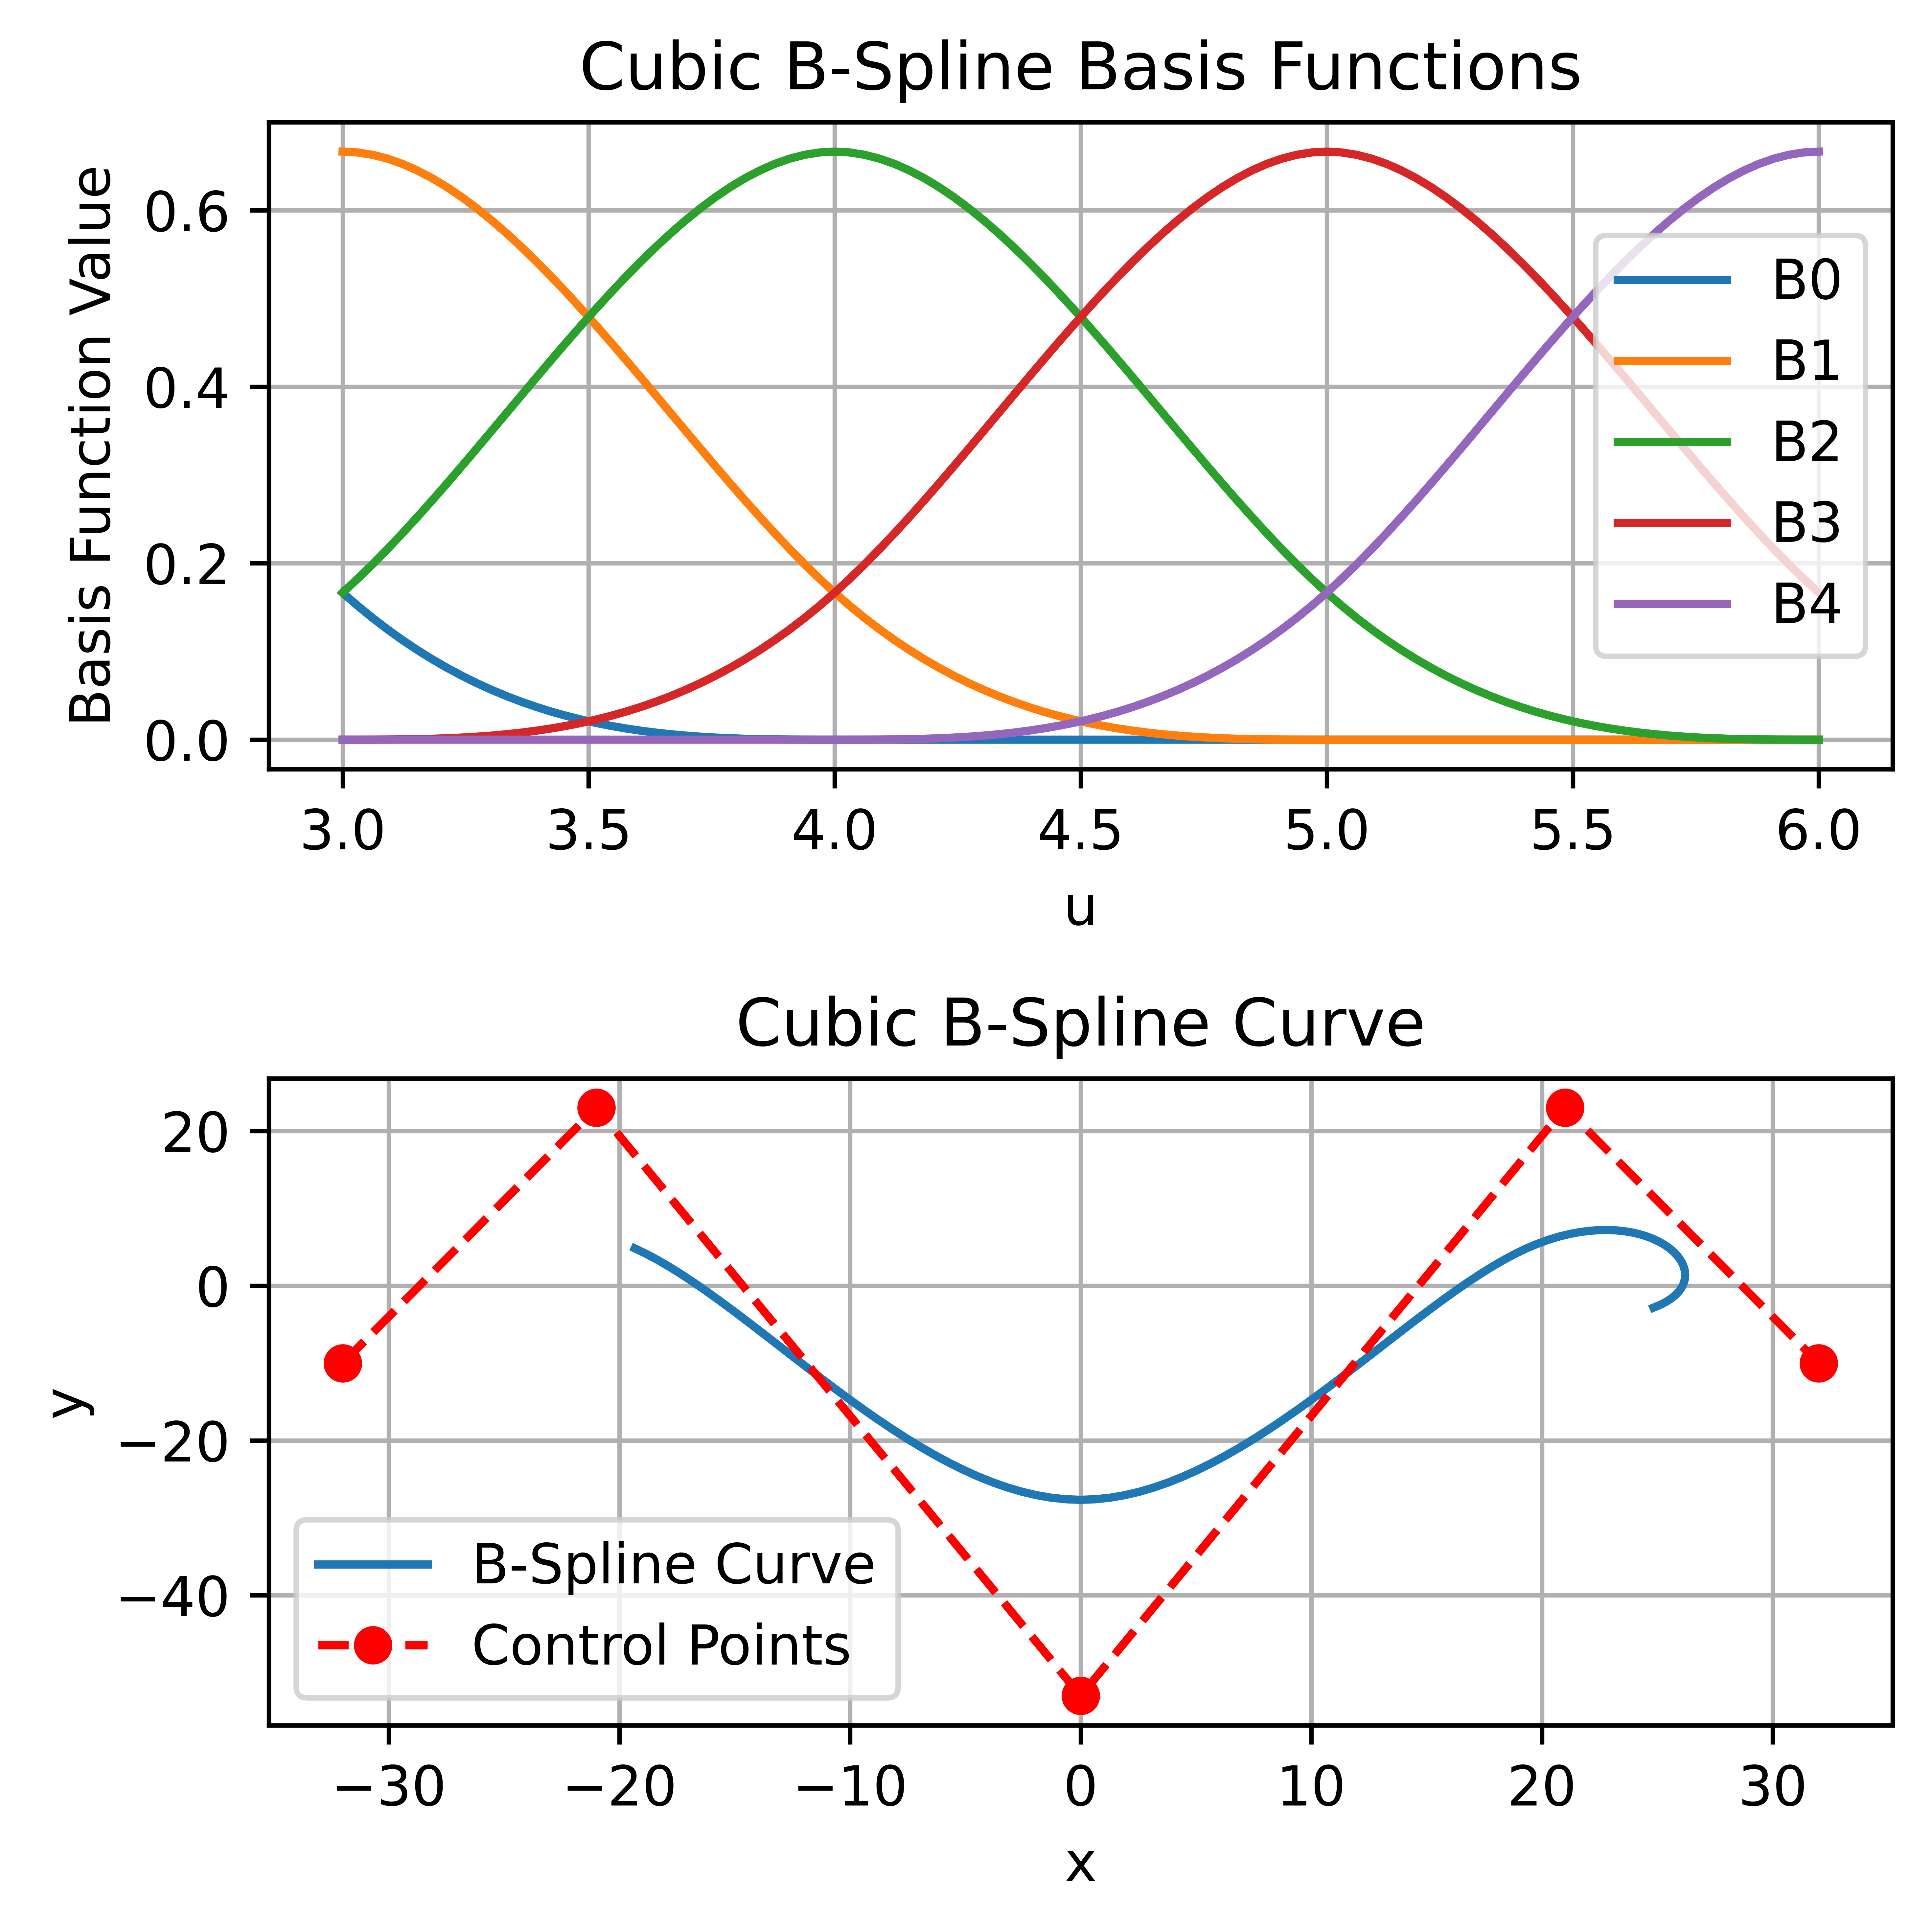

In [16]:
control_points = np.array([
    [
        -32,
        -10
    ],
    [
        -21,
        23
    ],
    [
        0,
        -53
    ],
    [
        21,
        23
    ],
    [
        32,
        -10
    ]
])
# control_points = np.array([[0, 0], [1, 2], [2, 0], [3, 2], [4, 0], [5, 0], [6, 1]])
n = 5
knots = np.arange(n + degree + 2)
degree = 3
u_values = np.linspace(knots[degree], knots[-degree - 1], 100)
evaluate_spline(control_points, knots, u_values)